# Finite Differences in two Dimension



### Inclusion of necessary packages

For numerical calculations it is necessary to include several program libraries:
- the numpy package is an absulote base requirement for mathematical problems
- matplotlib.pyplot library is required for the visualisation. For convenience, the abbreviation plt is used.

In [224]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Parameter Definition and preparation of data structure and initial values

In [225]:
# Parameters
N = 100

# create tables of values
U_start = np.zeros([N,N])
U = np.copy(U_start)
V_start = np.zeros([N,N])
V = np.copy(V_start)

x = np.zeros(N)
xSize = np.pi * 2

## Dirichlet boundary conditions


In [226]:
x = np.linspace(0,2*np.pi,N)

for n in range(0,N): 
    V_start[N-1,n] = np.cos(x[n])
    U_start[N-1,n] = np.sin(x[n]) 

## Periodic boundary conditions


In [227]:
#for i in range(0, N):
 #   for j in range(0, N):
  #      dx1 = x[j] - x[i]
    #    dx = np.mod(dx1, xSize * 0.5)
   #     V[i-1, 0] = dx
     #   U[i-1, 0] = dx
       # V[i-1, N-1] = dx
      #  U[i-1, N-1] = dx

### Computation

In [228]:
count = 0
for i in range(1,N-1):
    for j in range(0,N-1):
        count = count + 1
        #U_start = np.copy(U)
        #V_start = np.copy(V)
        #U[i,j] = U[i,j+1] - V[i+1,j] + V[i,j]
       # V[i,j] = U[i+1,j] - U[i,j] + V[i,j+1]
        #U[i,j+1] = U_start[i,j] + V_start[i+1,j] - V_start[i,j]
        U[i+1,j] = U_start[i,j] - V_start[i+1,j] + V_start[i,j]
        #V[i,j+1] = U_start[i,j] - U_start[i+1,j] + V_start[i,j]
        V[i+1,j] = U_start[i+1,j] + V_start[i,j] - U_start[i,j]
        #U[i+1,j] = U[i,j] +  V[i+1,j] - V[i,j]
        #V[i+1,j] = U[i,j] + V[i,j] - U[i+1,j]
        dx1 = x[j] - x[i] 
        dx = np.mod(dx1, xSize * 0.5)
        V[i-1, 0] = dx
        U[i-1, 0] = dx
        V[i-1, N-1] = dx
        U[i-1, N-1] = dx
        #U[i-1,0]=U[i-1,N-1]
        #V[i-1,0]=V[i-1,N-1]
        
    
   

    

### Raw output

In [229]:
# Output of all values (optional)
print(U)
print('-------------')
print(V)

[[ 3.01465962  0.          0.         ...  0.          0.
   3.01465962]
 [ 2.9511931   0.          0.         ...  0.          0.
   2.9511931 ]
 [ 2.88772658  0.          0.         ...  0.          0.
   2.88772658]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-1.         -0.99798668 -0.99195481 ... -0.99195481 -0.99798668
   0.        ]]
-------------
[[ 3.01465962  0.          0.         ...  0.          0.
   3.01465962]
 [ 2.9511931   0.          0.         ...  0.          0.
   2.9511931 ]
 [ 2.88772658  0.          0.         ...  0.          0.
   2.88772658]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.06342392  0.12659245 ... -0.12659245 -0.06342392
   0.        ]]


### Visualisation of the results


<IPython.core.display.Javascript object>


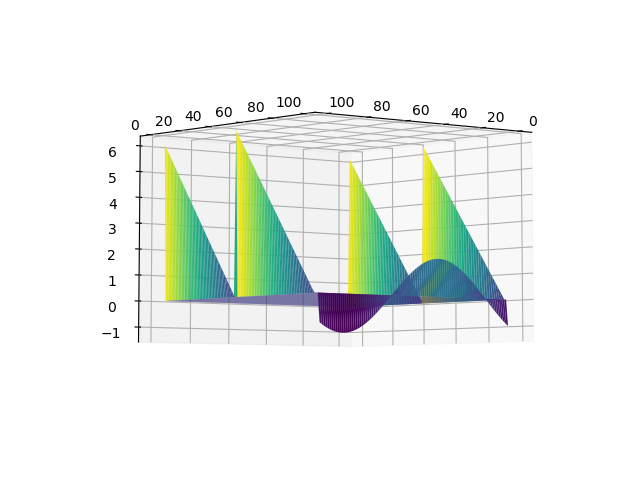

In [234]:
# coordinates
x = range(N)
y = range(N)
x, y = np.meshgrid(x, y)

# for interactive plot
%matplotlib notebook

# create plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, U, rstride=1, cstride=1, cmap='viridis', edgecolor='none')


<IPython.core.display.Javascript object>


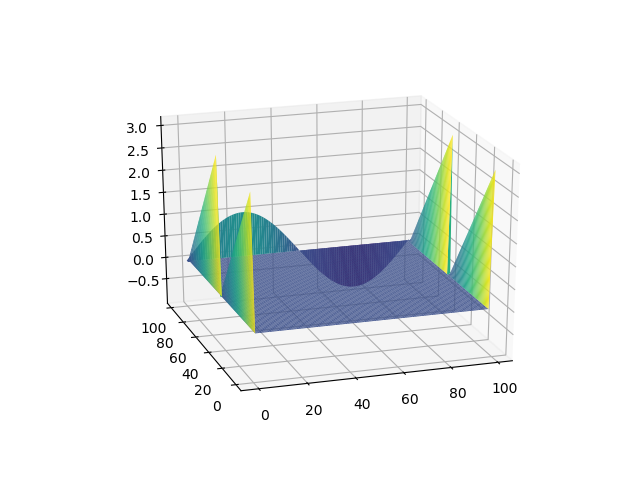

In [235]:
# create plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, V, rstride=1, cstride=1, cmap='viridis', edgecolor='none')


<IPython.core.display.Javascript object>


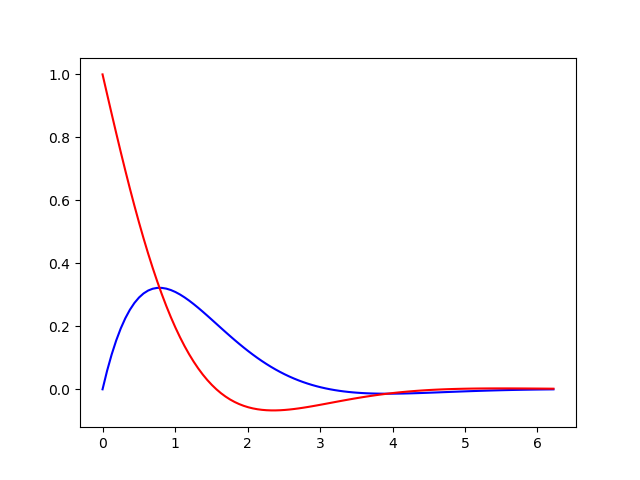

In [233]:
n = np.zeros([N,N])
m = np.zeros([N,N])
n[0,:]= np.arange(0, 2*np.pi, 2*np.pi/N)
m[0,:]= np.arange(0, 2*np.pi, 2*np.pi/N)

#V[n,m]=np.exp(-(m[0,:]))*np.sin(n[0,:])

# create plot
plt.figure()
plt.plot(m[0,:], np.exp(-(m[0,:]))*np.sin(n[0,:]), 'b',
         n[0,:], np.exp(-(m[0,:]))*np.cos(n[0,:]), 'r')
plt.show()